In [2]:
import matplotlib.pyplot as plt
import matplotlib.style as style
import pandas as pd
import numpy as np
from astropy.io import fits

# # num_rows = data_result.shape[0]
data_result = pd.read_csv('feng_mass.dat', sep=' ')
data_result = data_result.iloc[0:-1]
data_result
# data_result = data_result[data_result['radius_true'] <= 0.5]
# data_result = data_result[data_result['mass']-data_result['mass_low'] <= 0.02]
# data_result = data_result[data_result['mass_up']-data_result['mass'] <= 0.02]
# data_result = data_result.dropna(subset=['radius_lei'])
# data_result = data_result[data_result['mass_max_density'] >= 0.35]
name = data_result['name']
mass = data_result['mass']
mass_low = data_result['mass_low']
mass_up = data_result['mass_up']
mass_lei = data_result['mass_lei']

# log_L = data_result['log_L']
# log_L_low = data_result['log_L_low']
# log_L_up = data_result['log_L_up']
# log_L_fontaine = data_result['log_L_lei']

# radius = data_result['radius']
# radius_low = data_result['radius_low']
# radius_up = data_result['radius_up']
# radius_lei = data_result['radius_lei']

# age = data_result['age']
# age_low = data_result['age_low']
# age_up = data_result['age_up']
# # age_lei = data_result['age_lei']

# log_Teff = data_result['log_Teff']
# mass_den = data_result['mass_max_density']
# log_L_den = data_result['log_L_max_density']
# radius_den = data_result['radius_max_density']

mass_true = data_result['mass_true']
# log_L_true = data_result['log_L_true']
# radius_true = data_result['radius_true']
# age_true = data_result['age_true']

计算值与真实值

斜率:  1.003956517848838
截距:  0.005921316115558786
标准差:  0.061081072268152285
方差:  0.0037308973894272426


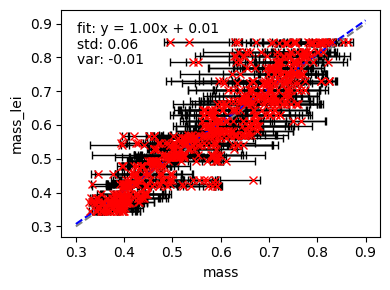

In [3]:
import numpy as np

# 进行线性拟合
m, b = np.polyfit(mass, mass_true, 1)

# 计算拟合的线性方程在给定的x值处的y值
y_fit = np.polyval([m, b], mass)
# 打印斜率、截距和误差
print("斜率: ", m)
print("截距: ", b)
# 计算残差
residuals = mass - mass_true

# 计算标准差
std_dev = np.std(residuals)
# 计算方差
variance = np.var(residuals)

print("标准差: ", std_dev)
print("方差: ", variance)

def plot(x, y, x_low, x_up, xlabel, ylabel, line_x_range):
    plt.figure(dpi=100, figsize=(4, 3))
    plt.errorbar(x, y, xerr=[x-x_low, x_up-x], fmt='x', color='r', ecolor='black', elinewidth=1, capsize=3)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    line_x = np.linspace(line_x_range[0], line_x_range[1], 100)
    plt.plot(line_x, line_x, color = 'gray', linestyle = '--')
    plt.plot(line_x, m * line_x + b, color='blue', linestyle = '--')
    plt.text(0.05, 0.90, f'fit: y = {m:.2f}x + {b:.2f}', transform=plt.gca().transAxes)
    plt.text(0.05, 0.83, f'std: {std_dev:.2f}', transform=plt.gca().transAxes)
    plt.text(0.05, 0.76, f'var: {np.mean(residuals):.2f}', transform=plt.gca().transAxes)

    plt.tight_layout()
    # plt.savefig(filename, dpi=200)
    # plt.show()

plot(mass, mass_true, mass_low, mass_up, 'mass', 'mass_lei', [0.3, 0.9])


det_mass:0.02 无修正 质量修正 卡方样本修正（2，5，10，50，100，200，500，1000）
det_mass:0.01 无修正 质量修正 卡方样本修正（2，5，10，50，100，200，500，1000）

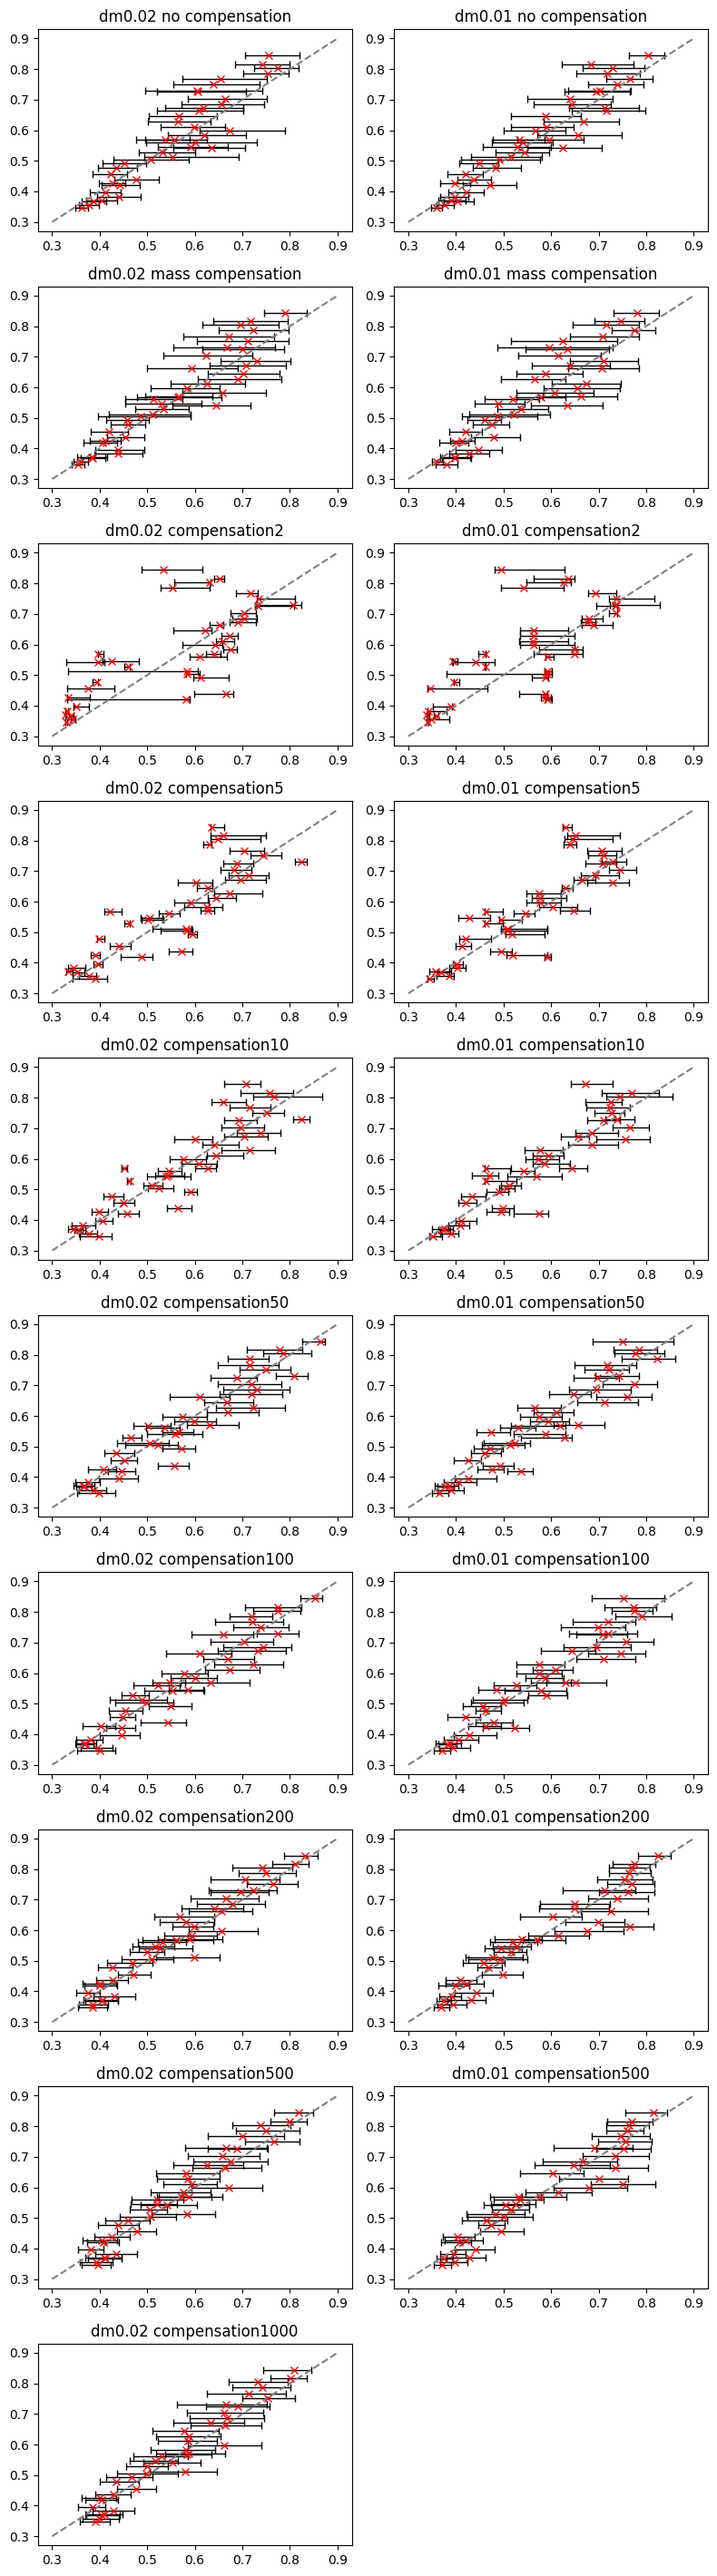

In [5]:
import matplotlib.pyplot as plt
import numpy as np

# 计算需要多少个子图
num_plots = int(np.ceil(len(mass) / 38.0))

# 创建两列的子图
fig, axs = plt.subplots(num_plots // 2 + num_plots % 2, 2, figsize=(8, 1.5*num_plots), dpi=100)
title = ['dm0.02 no compensation', 'dm0.02 mass compensation', 'dm0.02 compensation2', 'dm0.02 compensation5', 'dm0.02 compensation10', 'dm0.02 compensation50', 'dm0.02 compensation100', 'dm0.02 compensation200', 'dm0.02 compensation500', 'dm0.02 compensation1000', 'dm0.01 no compensation', 'dm0.01 mass compensation', 'dm0.01 compensation2', 'dm0.01 compensation5', 'dm0.01 compensation10', 'dm0.01 compensation50', 'dm0.01 compensation100', 'dm0.01 compensation200', 'dm0.01 compensation500', 'dm0.01 compensation1000']

# 在每个子图上画出一部分数据点
for i in range(num_plots):
    if i < 10:
        row = i
        col = 0
    else:
        row = i - 10
        col = 1
    start = i * 38
    end = min((i + 1) * 38-1, len(mass))
    x = mass[start:end]
    y = mass_true[start:end]
    x_low = mass_low[start:end]
    x_up = mass_up[start:end]
    m, b = np.polyfit(x, y, 1)
    y_fit = np.polyval([m, b], x)
    residuals = x - y_fit
    std_dev = np.std(residuals)
    variance = np.var(residuals)
    line_x = np.linspace(0.3, 0.9, 100)
    axs[row, col].errorbar(x, y, xerr=[x-x_low, x_up-x], fmt='x', color='r', ecolor='black', elinewidth=1, capsize=3)
    axs[row, col].plot(line_x, line_x, color = 'gray', linestyle = '--')
    # axs[row, col].plot(line_x, m * line_x + b, color='blue', linestyle = '--')
    axs[row, col].set_title(title[i])
    # axs[row, col].text(0.05, 0.90, f'fit: y = {m:.4f}x {"+" if b >= 0 else "-"} {abs(b):.4f}', transform=axs[row, col].transAxes)
    # axs[row, col].text(0.05, 0.83, f'std: {std_dev:.5f}', transform=axs[row, col].transAxes)
    # axs[row, col].text(0.05, 0.76, f'var: {variance:.5f}', transform=axs[row, col].transAxes)

# 如果子图的数量是奇数，隐藏最后一个子图
if num_plots % 2:
    axs[-1, -1].axis('off')

plt.tight_layout()
# plt.savefig(filename, dpi=200)
# plt.show()

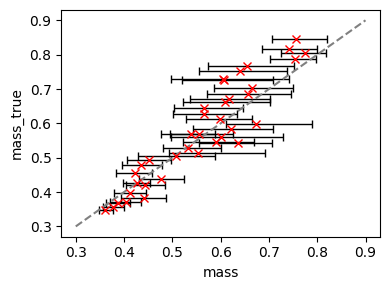

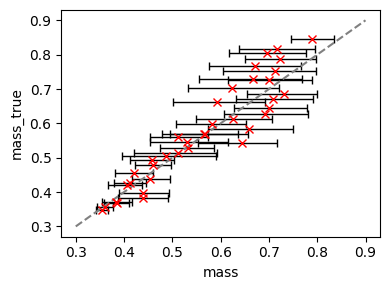

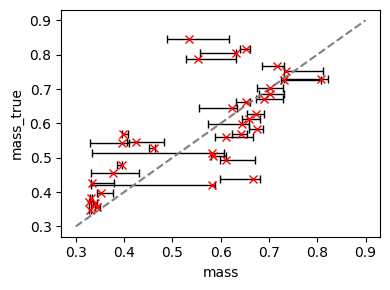

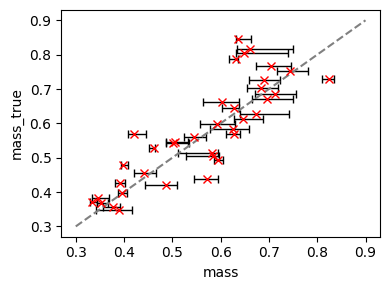

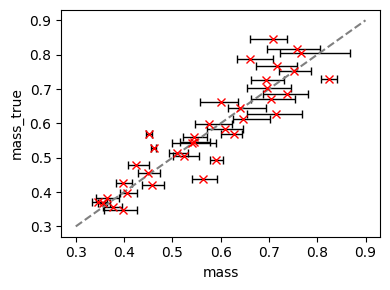

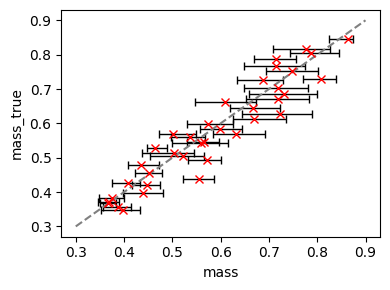

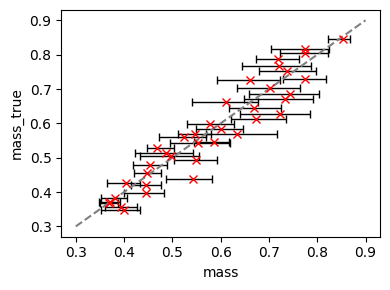

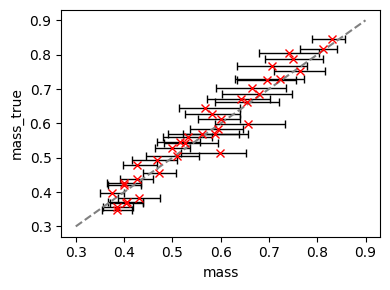

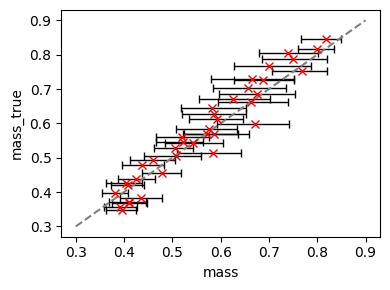

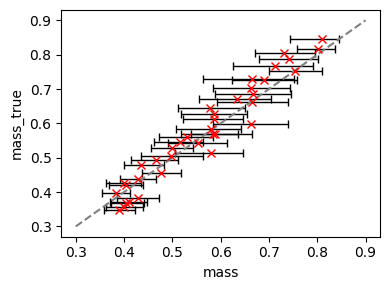

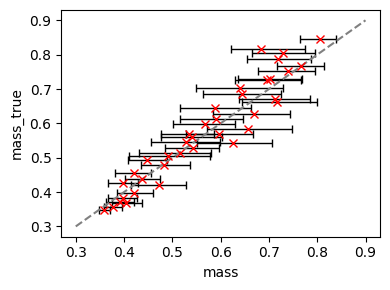

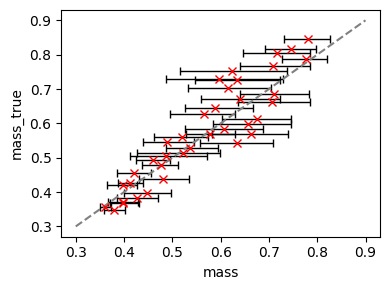

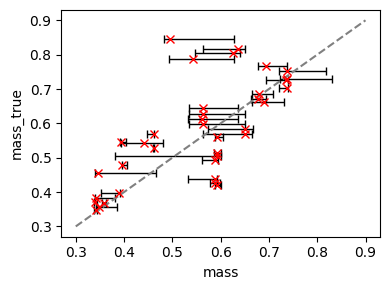

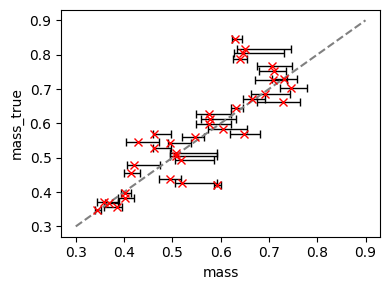

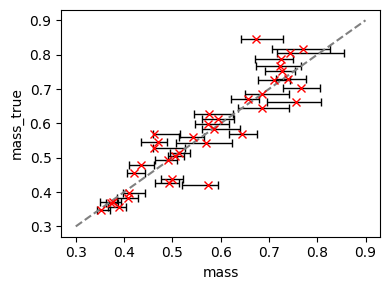

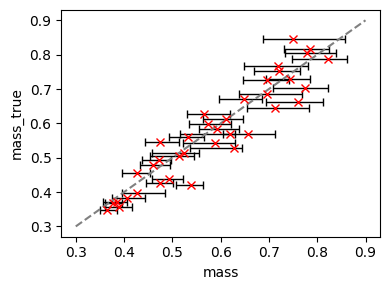

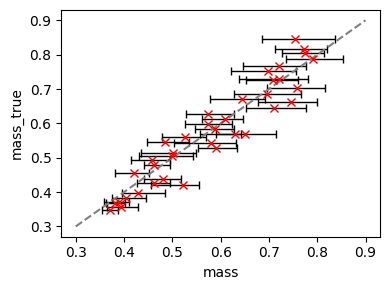

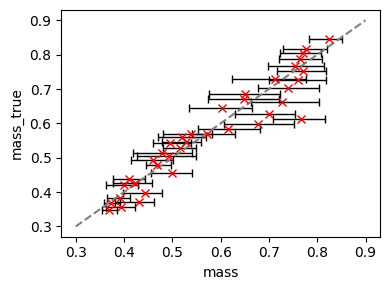

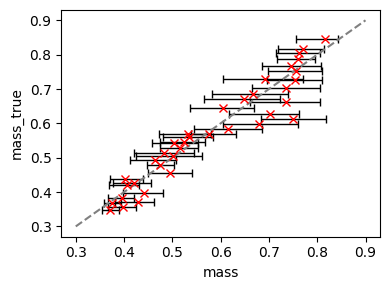

In [6]:
num_plots = int(np.ceil(len(mass) / 38.0))
for i in range(num_plots):
    fig, ax = plt.subplots(figsize=(4, 3), dpi=100)
    start = i * 38
    end = min((i + 1) * 38-1, len(mass))
    x = mass[start:end]
    y = mass_true[start:end]
    x_low = mass_low[start:end]
    x_up = mass_up[start:end]
    m, b = np.polyfit(x, y, 1)
    y_fit = np.polyval([m, b], x)
    residuals = x - y_fit
    std_dev = np.std(residuals)
    variance = np.var(residuals)
    line_x = np.linspace(0.3, 0.9, 100)
    ax.errorbar(x, y, xerr=[x-x_low, x_up-x], fmt='x', color='r', ecolor='black', elinewidth=1, capsize=3)
    ax.plot(line_x, line_x, color = 'gray', linestyle = '--')
    # ax.plot(line_x, m * line_x + b, color='blue', linestyle = '--')
    # ax.text(0.05, 0.90, f'fit: y = {m:.4f}x {"+" if b >= 0 else "-"} {abs(b):.4f}', transform=ax.transAxes)
    # ax.text(0.05, 0.83, f'std: {std_dev:.5f}', transform=ax.transAxes)
    # ax.text(0.05, 0.76, f'var: {variance:.5f}', transform=ax.transAxes)
    plt.xlabel('mass')
    plt.ylabel('mass_true')
    plt.tight_layout()
    plt.show()

In [7]:
import matplotlib.pyplot as plt
import matplotlib.style as style
import pandas as pd
import numpy as np
from astropy.io import fits

# # num_rows = data_result.shape[0]
data_result_lei = pd.read_csv('feng.dat', sep=' ')
data_result_lei = data_result_lei.iloc[38:-1]
# data_result_lei = data_result_lei[data_result_lei['mass_lei']> 0.35]
# data_result_lei = data_result_lei[data_result_lei['he_class'] == 'sdB']
name = data_result_lei['name']
mass = data_result_lei['mass']
mass_low = data_result_lei['mass_low']
mass_up = data_result_lei['mass_up']
mass_lei = data_result_lei['mass_lei']

log_L = data_result_lei['log_L']
log_L_low = data_result_lei['log_L_low']
log_L_up = data_result_lei['log_L_up']
log_L_lei = data_result_lei['log_L_lei']

radius = data_result_lei['radius']
radius_low = data_result_lei['radius_low']
radius_up = data_result_lei['radius_up']
radius_lei = data_result_lei['radius_lei']



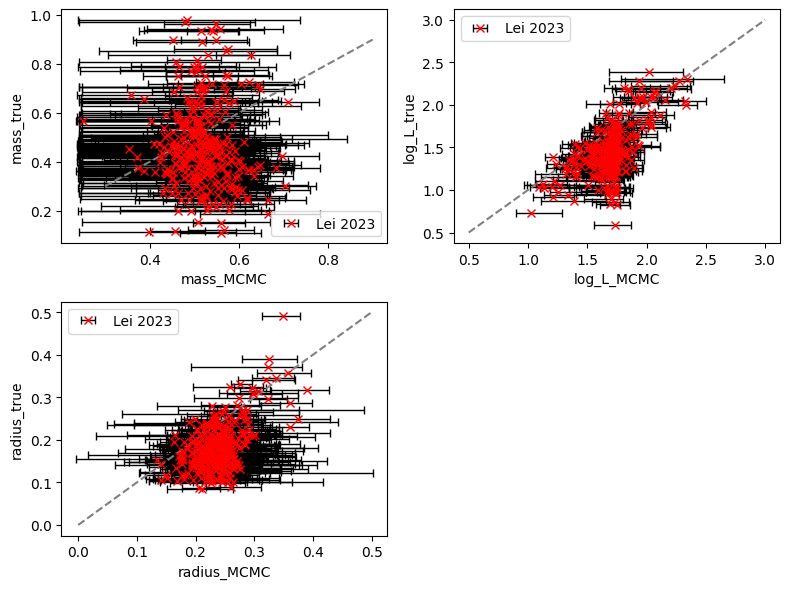

In [10]:
import numpy as np



def plot(ax, x, y, x_low, x_up, line_x_range, fmt, color, label):
    ax.errorbar(x, y, xerr=[x-x_low, x_up-x], fmt=fmt, color=color, ecolor='black', elinewidth=1, capsize=3, label=label, markerfacecolor='none', markeredgecolor=color)
    line_x = np.linspace(line_x_range[0], line_x_range[1], 100)
    ax.plot(line_x, line_x, color = 'gray', linestyle = '--')
    plt.xlim=(line_x_range)
    plt.ylim=(line_x_range)
    ax.legend()

fig, axes = plt.subplots(2, 2, dpi=100, figsize=(8, 6))

axes[0, 0].set_xlabel('mass_MCMC')
axes[0, 0].set_ylabel('mass_true')
# plot(axes[0, 0], test_mass, test_mass_true, test_mass_low, test_mass_up, [0.3, 0.9], 'x', 'r', 'test')
plot(axes[0, 0], mass, mass_lei, mass_low, mass_up, [0.3, 0.9],'x', 'r', 'Lei 2023')
# plot(axes[0, 0], fontaine_mass, fontaine_mass_true, fontaine_mass_low, fontaine_mass_up, [0.3, 0.9],'s', 'g', 'Fontaine 2012')

axes[0, 1].set_xlabel('log_L_MCMC')
axes[0, 1].set_ylabel('log_L_true')
# plot(axes[0, 1], test_log_L, test_log_L_true, test_log_L_low, test_log_L_up,  [0.5, 3], 'x', 'r', 'test')
plot(axes[0, 1], log_L, log_L_lei, log_L_low, log_L_up, [0.5, 3],'x', 'r', 'Lei 2023')

axes[1, 0].set_xlabel('radius_MCMC')
axes[1, 0].set_ylabel('radius_true')
# plot(axes[1, 0], test_radius, test_radius_true, test_radius_low, test_radius_up,  [0, 0.5], 'x', 'r', 'test')
plot(axes[1, 0], radius, radius_lei, radius_low, radius_up, [0, 0.5],'x', 'r', 'Lei 2023')

# axes[1, 1].set_xlabel('log_age_MCMC')
# axes[1, 1].set_ylabel('log_age_true')
# plot(axes[1, 1], test_age, test_age_true, test_age_low, test_age_up,  [7.7, 9.2], 'x', 'r', 'test')
axes[-1, -1].axis('off')
plt.tight_layout()
plt.show()
# plot(mass, mass_lei, mass_low, mass_import numpy as np

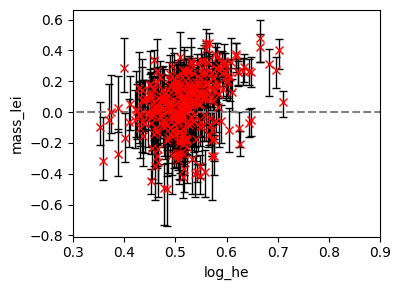

In [14]:
def plot_scatter_and_line(x, y1, y2, y2_low, y2_up, xlabel, ylabel):
    plt.figure(dpi=100, figsize=(4, 3))
    plt.errorbar(x, y1 - y2, yerr=[y1-y2_low, y2_up-y1], fmt='x', color='r', ecolor='black', elinewidth=1, capsize=3)
    # plt.scatter(x,y)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    line_x = np.linspace(min(log_he), max(log_he), 100)
    plt.plot(line_x, 0*line_x, color = 'gray', linestyle = '--')
    plt.tight_layout()
    plt.xlim(0.3, 0.9)
    # plt.show()

log_he = data_result_lei['log_he']

plot_scatter_and_line(mass, mass, mass_lei, mass_low, mass_up, 'log_he', 'mass_lei')
# plot_scatter_and_line(log_he, log_L, log_L_true, log_L_low, log_L_up, 'log_he', 'log_L_lei')
# plot_scatter_and_line(log_he, radius, radius_true, radius_low, radius_up, 'log_he', 'radius_lei')
# plot_scatter_and_line(age, age_true, age_low, age_up, 'age', 'age_lei', 'Scatter plot of age vs age_lei', [7.2, 9.2])


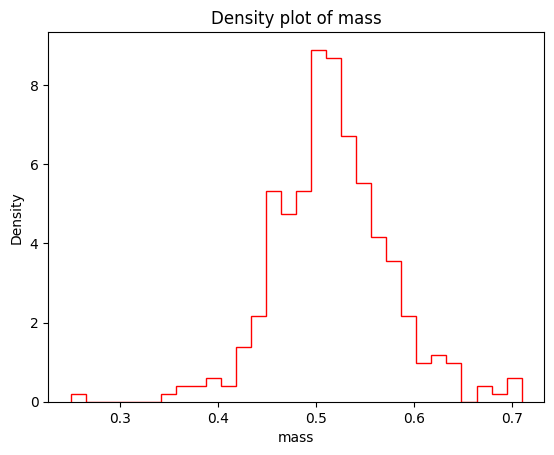

In [15]:
def plot_density(data, title, xlabel):
    plt.figure()
    plt.hist(data, bins=30, density=True, alpha=1, histtype='step', edgecolor='red')
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel('Density')
    # plt.show()

plot_density(mass, 'Density plot of mass', 'mass')
# plot_density(log_L, 'Density plot of log_L', 'log_L')
# plot_density(radius, 'Density plot of radius', 'radius')
# # plot_density(age, 'Density plot of age', 'age')

In [16]:
import matplotlib.pyplot as plt
import matplotlib.style as style
import pandas as pd
import numpy as np
from astropy.io import fits

# # num_rows = data_result.shape[0]
data_result = pd.read_csv('test_mass.dat', sep=' ')
data_result = data_result.iloc[0:-1]
data_result

name = data_result['name']
mass = data_result['mass']
mass_low = data_result['mass_low']
mass_up = data_result['mass_up']
mass_lei = data_result['mass_lei']

mass_true = data_result['mass_true']


斜率:  1.0705579615587255
截距:  -0.032991080616112625
标准差:  0.056829677612963876
方差:  0.0032296122575934077


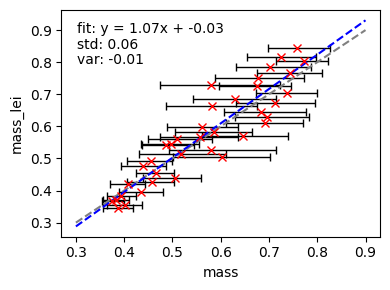

In [17]:
import numpy as np

# 进行线性拟合
m, b = np.polyfit(mass, mass_true, 1)

# 计算拟合的线性方程在给定的x值处的y值
y_fit = np.polyval([m, b], mass)
# 打印斜率、截距和误差
print("斜率: ", m)
print("截距: ", b)
# 计算残差
residuals = mass - mass_true

# 计算标准差
std_dev = np.std(residuals)
# 计算方差
variance = np.var(residuals)

print("标准差: ", std_dev)
print("方差: ", variance)

def plot(x, y, x_low, x_up, xlabel, ylabel, line_x_range):
    plt.figure(dpi=100, figsize=(4, 3))
    plt.errorbar(x, y, xerr=[x-x_low, x_up-x], fmt='x', color='r', ecolor='black', elinewidth=1, capsize=3)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    line_x = np.linspace(line_x_range[0], line_x_range[1], 100)
    plt.plot(line_x, line_x, color = 'gray', linestyle = '--')
    plt.plot(line_x, m * line_x + b, color='blue', linestyle = '--')
    plt.text(0.05, 0.90, f'fit: y = {m:.2f}x + {b:.2f}', transform=plt.gca().transAxes)
    plt.text(0.05, 0.83, f'std: {std_dev:.2f}', transform=plt.gca().transAxes)
    plt.text(0.05, 0.76, f'var: {np.mean(residuals):.2f}', transform=plt.gca().transAxes)

    plt.tight_layout()


plot(mass, mass_true, mass_low, mass_up, 'mass', 'mass_lei', [0.3, 0.9])

In [15]:
import matplotlib.pyplot as plt
import matplotlib.style as style
import pandas as pd
import numpy as np
from astropy.io import fits

# # num_rows = data_result.shape[0]
data_result = pd.read_csv('lei_mass1.dat', sep=' ')
data_result = data_result.iloc[0:-1]
data_result

name = data_result['name']
mass = data_result['mass']
mass_low = data_result['mass_low']
mass_up = data_result['mass_up']
mass_lei = data_result['mass_lei']

# mass_true = data_result['mass_true']

斜率:  -0.2203398796510947
截距:  0.5712740455816826
标准差:  0.2106541063985366
方差:  0.04437515254256598


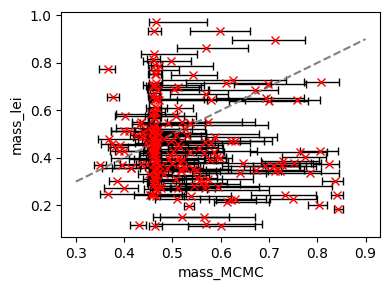

In [85]:
import numpy as np

# 进行线性拟合
m, b = np.polyfit(mass, mass_lei, 1)

# 计算拟合的线性方程在给定的x值处的y值
y_fit = np.polyval([m, b], mass)
# 打印斜率、截距和误差
print("斜率: ", m)
print("截距: ", b)
# 计算残差
residuals = mass - mass_lei

# 计算标准差
std_dev = np.std(residuals)
# 计算方差
variance = np.var(residuals)

print("标准差: ", std_dev)
print("方差: ", variance)

def plot(x, y, x_low, x_up, xlabel, ylabel, line_x_range):
    plt.figure(dpi=100, figsize=(4, 3))
    plt.errorbar(x, y, xerr=[x-x_low, x_up-x], fmt='x', color='r', ecolor='black', elinewidth=1, capsize=3)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    line_x = np.linspace(line_x_range[0], line_x_range[1], 100)
    plt.plot(line_x, line_x, color = 'gray', linestyle = '--')
    # plt.plot(line_x, m * line_x + b, color='blue', linestyle = '--')
    # plt.text(0.05, 0.90, f'fit: y = {m:.2f}x + {b:.2f}', transform=plt.gca().transAxes)
    # plt.text(0.05, 0.83, f'std: {std_dev:.2f}', transform=plt.gca().transAxes)
    # plt.text(0.05, 0.76, f'var: {np.mean(residuals):.2f}', transform=plt.gca().transAxes)

    plt.tight_layout()


plot(mass, mass_lei, mass_low, mass_up, 'mass_MCMC', 'mass_lei', [0.3, 0.9])

In [20]:
import matplotlib.pyplot as plt
import matplotlib.style as style
import pandas as pd
import numpy as np
from astropy.io import fits

# # num_rows = data_result.shape[0]
data_result = pd.read_csv('test_gauss.dat', sep=' ')
data_result = data_result.iloc[37:-1]
data_result = data_result[data_result['radius_true']<0.5]
print(data_result)
name = data_result['name']
mass = data_result['mass']
mass_low = data_result['mass_low']
mass_up = data_result['mass_up']
mass_lei = data_result['mass_lei']
mass_true = data_result['mass_true']

log_L = data_result['log_L']
log_L_low = data_result['log_L_low']
log_L_up = data_result['log_L_up']
log_L_lei = data_result['log_L_lei']
log_L_true = data_result['log_L_true']

radius = data_result['radius']
radius_low = data_result['radius_low']
radius_up = data_result['radius_up']
radius_lei = data_result['radius_lei']

radius_true = data_result['radius_true']

test_age = data_result['age']
test_age_low = data_result['age_low']
test_age_up = data_result['age_up']
test_age_true = data_result['age_true']

      name  mass_lei  log_L_lei  radius_lei  mass_true  log_L_true  \
37   star0       NaN        NaN         NaN   0.346943    0.518255   
38   star1       NaN        NaN         NaN   0.355565    0.901873   
39   star0       NaN        NaN         NaN   0.346943    0.755298   
40   star1       NaN        NaN         NaN   0.355565    0.723898   
41   star2       NaN        NaN         NaN   0.368435    0.943534   
42   star3       NaN        NaN         NaN   0.371349    0.802167   
43   star4       NaN        NaN         NaN   0.383071    0.819754   
44   star5       NaN        NaN         NaN   0.396232    1.119339   
45   star6       NaN        NaN         NaN   0.426175    0.998594   
46   star7       NaN        NaN         NaN   0.420455    0.947782   
47   star8       NaN        NaN         NaN   0.438204    1.313484   
48   star9       NaN        NaN         NaN   0.454926    1.108556   
51  star12       NaN        NaN         NaN   0.492093    1.291659   
53  star16       NaN

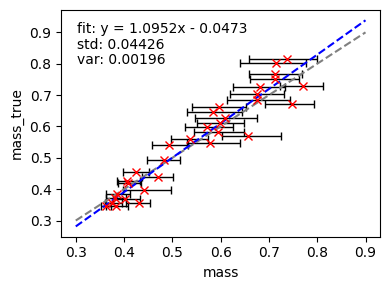

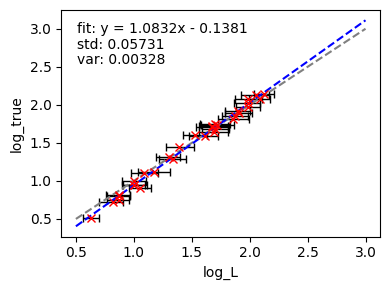

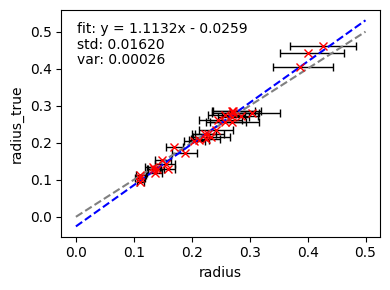

In [21]:
import numpy as np

def plot(x, y, x_low, x_up, xlabel, ylabel, line_x_range):
    m, b = np.polyfit(x, y, 1)
    y_fit = np.polyval([m, b], mass)

    residuals = x - y
    std_dev = np.std(residuals)
    variance = np.var(residuals)
    plt.figure(dpi=100, figsize=(4, 3))
    plt.errorbar(x, y, xerr=[x-x_low, x_up-x], fmt='x', color='r', ecolor='black', elinewidth=1, capsize=3)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    line_x = np.linspace(line_x_range[0], line_x_range[1], 100)
    plt.plot(line_x, line_x, color = 'gray', linestyle = '--')
    plt.plot(line_x, m * line_x + b, color='blue', linestyle = '--')
    plt.text(0.05, 0.90, f'fit: y = {m:.4f}x {"+" if b >= 0 else "-"} {abs(b):.4f}', transform=plt.gca().transAxes)
    plt.text(0.05, 0.83, f'std: {std_dev:.5f}', transform=plt.gca().transAxes)
    plt.text(0.05, 0.76, f'var: {variance:.5f}', transform=plt.gca().transAxes)
    plt.tight_layout()
    # plt.savefig(filename, dpi=200)
    # plt.show()

plot(mass, mass_true, mass_low, mass_up, 'mass', 'mass_true', [0.3, 0.9])
plot(log_L, log_L_true, log_L_low, log_L_up, 'log_L', 'log_true', [0.5, 3])
plot(radius, radius_true, radius_low, radius_up, 'radius', 'radius_true', [0, 0.5])
plot(radius, radius_true, radius_low, radius_up, 'radius', 'radius_true', [0, 0.5])

In [12]:
import matplotlib.pyplot as plt
import matplotlib.style as style
import pandas as pd
import numpy as np
from astropy.io import fits

# # num_rows = data_result.shape[0]
data_result_lei = pd.read_csv('lei_gauss.dat', sep=' ')
data_result_lei = data_result_lei.iloc[56:-1]
# data_result_lei = data_result_lei[data_result_lei['mass_lei']> 0.40]
# data_result_lei = data_result_lei[abs(data_result_lei['mass_lei']-data_result_lei['mass'])< 0.1]
# data_result_lei = data_result_lei[abs(data_result_lei['mass_lei']-data_result_lei['mass_up'])< 0.1]
# data_result_lei = data_result_lei[data_result_lei['he_class'] == 'sdB']
lei_name = data_result_lei['name']
lei_mass = data_result_lei['mass']
lei_mass_low = data_result_lei['mass_low']
lei_mass_up = data_result_lei['mass_up']
lei_mass_lei = data_result_lei['mass_lei']

lei_log_L = data_result_lei['log_L']
lei_log_L_low = data_result_lei['log_L_low']
lei_log_L_up = data_result_lei['log_L_up']
lei_log_L_lei = data_result_lei['log_L_lei']

lei_radius = data_result_lei['radius']
lei_radius_low = data_result_lei['radius_low']
lei_radius_up = data_result_lei['radius_up']
lei_radius_lei = data_result_lei['radius_lei']



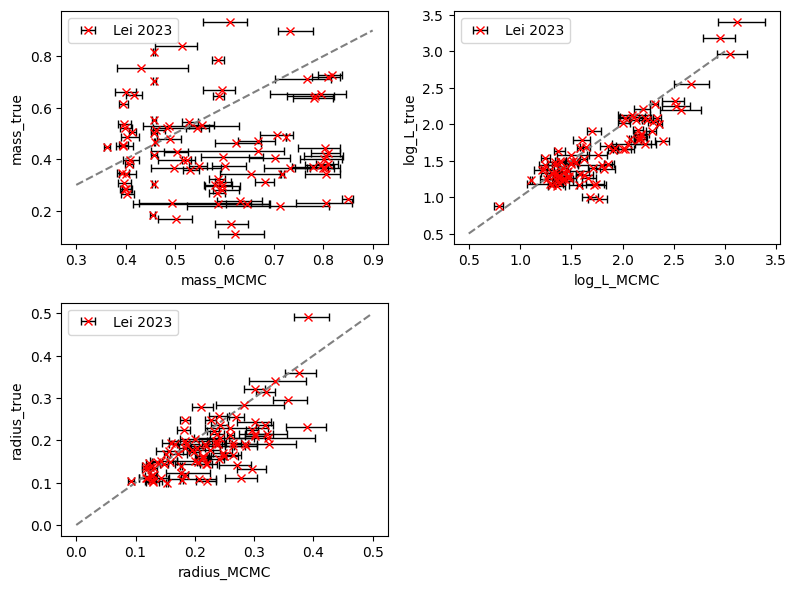

90


In [13]:
import numpy as np



def plot(ax, x, y, x_low, x_up, line_x_range, fmt, color, label):
    ax.errorbar(x, y, xerr=[x-x_low, x_up-x], fmt=fmt, color=color, ecolor='black', elinewidth=1, capsize=3, label=label, markerfacecolor='none', markeredgecolor=color)
    line_x = np.linspace(line_x_range[0], line_x_range[1], 100)
    ax.plot(line_x, line_x, color = 'gray', linestyle = '--')
    plt.xlim=(line_x_range)
    plt.ylim=(line_x_range)
    ax.legend()

fig, axes = plt.subplots(2, 2, dpi=100, figsize=(8, 6))

axes[0, 0].set_xlabel('mass_MCMC')
axes[0, 0].set_ylabel('mass_true')
# plot(axes[0, 0], test_mass, test_mass_true, test_mass_low, test_mass_up, [0.3, 0.9], 'x', 'r', 'test')
plot(axes[0, 0], lei_mass, lei_mass_lei, lei_mass_low, lei_mass_up, [0.3, 0.9],'x', 'r', 'Lei 2023')
# plot(axes[0, 0], fontaine_mass, fontaine_mass_true, fontaine_mass_low, fontaine_mass_up, [0.3, 0.9],'s', 'g', 'Fontaine 2012')

axes[0, 1].set_xlabel('log_L_MCMC')
axes[0, 1].set_ylabel('log_L_true')
# plot(axes[0, 1], test_log_L, test_log_L_true, test_log_L_low, test_log_L_up,  [0.5, 3], 'x', 'r', 'test')
plot(axes[0, 1], lei_log_L, lei_log_L_lei, lei_log_L_low, lei_log_L_up, [0.5, 3],'x', 'r', 'Lei 2023')

axes[1, 0].set_xlabel('radius_MCMC')
axes[1, 0].set_ylabel('radius_true')
# plot(axes[1, 0], test_radius, test_radius_true, test_radius_low, test_radius_up,  [0, 0.5], 'x', 'r', 'test')
plot(axes[1, 0], lei_radius, lei_radius_lei, lei_radius_low, lei_radius_up, [0, 0.5],'x', 'r', 'Lei 2023')

# axes[1, 1].set_xlabel('log_age_MCMC')
# axes[1, 1].set_ylabel('log_age_true')
# plot(axes[1, 1], test_age, test_age_true, test_age_low, test_age_up,  [7.7, 9.2], 'x', 'r', 'test')
axes[-1, -1].axis('off')
plt.tight_layout()
plt.show()
print(len(data_result_lei))



17


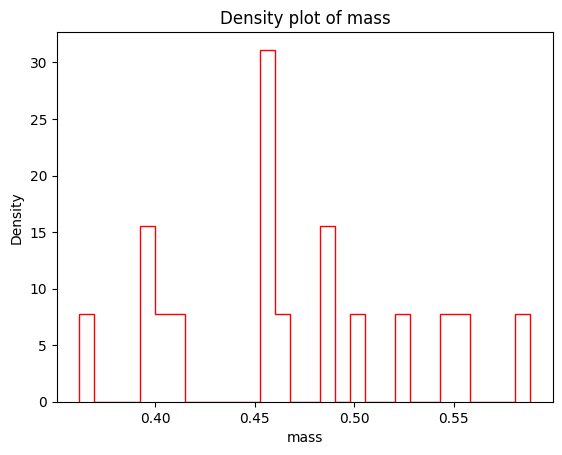

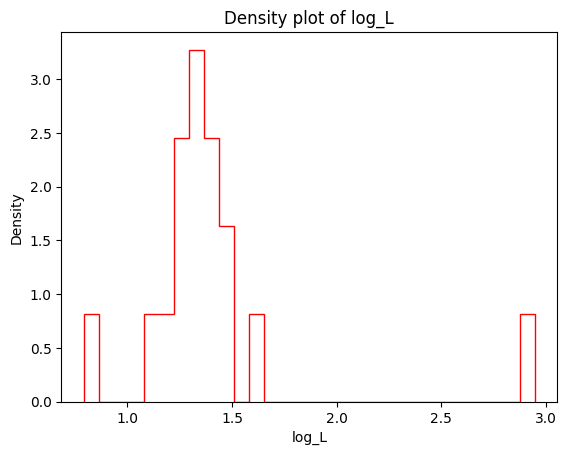

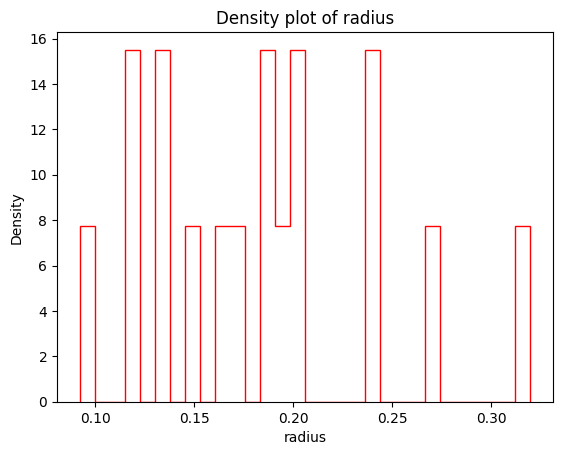

In [19]:
def plot_density(data, title, xlabel):
    plt.figure()
    plt.hist(data, bins=30, density=True, alpha=1, histtype='step', edgecolor='red')
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel('Density')
    # plt.show()
print(len(data_result_lei))
plot_density(mass, 'Density plot of mass', 'mass')
plot_density(log_L, 'Density plot of log_L', 'log_L')
plot_density(radius, 'Density plot of radius', 'radius')
# # plot_density(age, 'Density plot of age', 'age')

In [58]:
import matplotlib.pyplot as plt
import matplotlib.style as style
import pandas as pd
import numpy as np
from astropy.io import fits

# # num_rows = data_result.shape[0]
data_result_lei = pd.read_csv('fontaine_gauss.dat', sep=' ')
data_result_lei = data_result_lei.iloc[0:1]
# data_result_lei = data_result_lei[data_result_lei['mass_lei']> 0.40]
# data_result_lei = data_result_lei[abs(data_result_lei['mass_lei']-data_result_lei['mass_low'])< 0.1]
# data_result_lei = data_result_lei[abs(data_result_lei['mass_lei']-data_result_lei['mass_up'])< 0.1]
# data_result_lei = data_result_lei[data_result_lei['he_class'] == 'sdB']
name = data_result_lei['name']
mass = data_result_lei['mass']
mass_low = data_result_lei['mass_low']
mass_up = data_result_lei['mass_up']
mass_lei = data_result_lei['mass_true']

# log_L = data_result_lei['log_L']
# log_L_low = data_result_lei['log_L_low']
# log_L_up = data_result_lei['log_L_up']
# log_L_lei = data_result_lei['log_L_lei']

# radius = data_result_lei['radius']
# radius_low = data_result_lei['radius_low']
# radius_up = data_result_lei['radius_up']
# radius_lei = data_result_lei['radius_lei']



In [34]:
print(data_result_lei)

            name  mass_lei  log_L_lei  radius_lei  mass_true  log_L_true  \
0   KPD1943+4058       NaN        NaN         NaN      0.496         NaN   
1     PG0014+067       NaN        NaN         NaN      0.477         NaN   
2   EC05217-3914       NaN        NaN         NaN      0.490         NaN   
3     PG1605+072       NaN        NaN         NaN      0.528         NaN   
4   KPD1943+4058       NaN        NaN         NaN      0.496         NaN   
5     PG0014+067       NaN        NaN         NaN      0.477         NaN   
6   EC05217-3914       NaN        NaN         NaN      0.490         NaN   
7   EC09582-1137       NaN        NaN         NaN      0.485         NaN   
8     PG1325+101       NaN        NaN         NaN      0.499         NaN   
9     PG1605+072       NaN        NaN         NaN      0.528         NaN   
10  KPD1943+4058       NaN        NaN         NaN      0.496         NaN   

    radius_true  age_true  he_class  log_he  ...  radius_low    radius  \
0           N

/tmp/ipykernel_731/204446940.py:27: RankWarning: Polyfit may be poorly conditioned
  plot(mass, mass_lei, mass_low, mass_up, 'mass_MCMC', 'mass_fontaine', [0.3, 0.9])


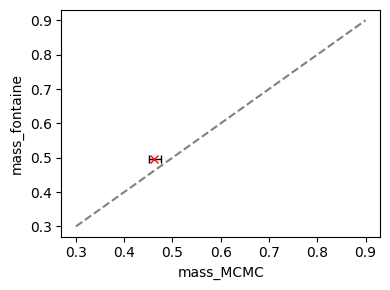

In [59]:
import numpy as np



def plot(x, y, x_low, x_up, xlabel, ylabel, line_x_range):
    m, b = np.polyfit(x, y, 1)
    y_fit = np.polyval([m, b], mass)

    residuals = x - y
    std_dev = np.std(residuals)
    variance = np.var(residuals)
    plt.figure(dpi=100, figsize=(4, 3))
    plt.errorbar(x, y, xerr=[x-x_low, x_up-x], fmt='x', color='r', ecolor='black', elinewidth=1, capsize=3)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    line_x = np.linspace(line_x_range[0], line_x_range[1], 100)
    plt.plot(line_x, line_x, color = 'gray', linestyle = '--')
    # plt.plot(line_x, m * line_x + b, color='blue', linestyle = '--')
    # plt.text(0.05, 0.90, f'fit: y = {m:.4f}x + {b:.4f}', transform=plt.gca().transAxes)
    # plt.text(0.05, 0.83, f'std: {std_dev:.4f}', transform=plt.gca().transAxes)
    # plt.text(0.05, 0.76, f'var: {variance:.4f}', transform=plt.gca().transAxes)

    plt.tight_layout()
    # plt.savefig(filename, dpi=200)
    # plt.show()

plot(mass, mass_lei, mass_low, mass_up, 'mass_MCMC', 'mass_fontaine', [0.3, 0.9])
# plot(log_L, log_L_lei, log_L_low, log_L_up, 'log_L', 'log_lei', [0.5, 3])
# plot(radius, radius_lei, radius_low, radius_up, 'radius', 'radius_lei', [0, 0.5])


In [17]:
import matplotlib.pyplot as plt
import matplotlib.style as style
import pandas as pd
import numpy as np
from astropy.io import fits

# # num_rows = data_result.shape[0]
data_result_test = pd.read_csv('test_gauss.dat', sep=' ')
data_result_test = data_result_test.iloc[37:-1]
data_result_test = data_result_test[data_result_test['radius_true']<0.5]
test_name = data_result_test['name']
test_mass = data_result_test['mass']
test_mass_low = data_result_test['mass_low']
test_mass_up = data_result_test['mass_up']
test_mass_lei = data_result_test['mass_lei']
test_mass_true = data_result_test['mass_true']

test_log_L = data_result_test['log_L']
test_log_L_low = data_result_test['log_L_low']
test_log_L_up = data_result_test['log_L_up']
test_log_L_lei = data_result_test['log_L_lei']
test_log_L_true = data_result_test['log_L_true']

test_radius = data_result_test['radius']
test_radius_low = data_result_test['radius_low']
test_radius_up = data_result_test['radius_up']
test_radius_lei = data_result_test['radius_lei']
test_radius_true = data_result_test['radius_true']

test_age = data_result_test['age']
test_age_low = data_result_test['age_low']
test_age_up = data_result_test['age_up']
test_age_true = data_result_test['age_true']

In [15]:
import matplotlib.pyplot as plt
import matplotlib.style as style
import pandas as pd
import numpy as np
from astropy.io import fits

# # num_rows = data_result.shape[0]
data_result_lei = pd.read_csv('lei_gauss.dat', sep=' ')
data_result_lei = data_result_lei.iloc[56:-1]
data_result_lei = data_result_lei[data_result_lei['mass_lei']> 0.40]
data_result_lei = data_result_lei[abs(data_result_lei['mass_lei']-data_result_lei['mass'])< 0.1]
# data_result_lei = data_result_lei[abs(data_result_lei['mass_lei']-data_result_lei['mass_up'])< 0.1]
# data_result_lei = data_result_lei[data_result_lei['he_class'] == 'sdB']
lei_name = data_result_lei['name']
lei_mass = data_result_lei['mass']
lei_mass_low = data_result_lei['mass_low']
lei_mass_up = data_result_lei['mass_up']
lei_mass_lei = data_result_lei['mass_lei']

lei_log_L = data_result_lei['log_L']
lei_log_L_low = data_result_lei['log_L_low']
lei_log_L_up = data_result_lei['log_L_up']
lei_log_L_lei = data_result_lei['log_L_lei']

lei_radius = data_result_lei['radius']
lei_radius_low = data_result_lei['radius_low']
lei_radius_up = data_result_lei['radius_up']
lei_radius_lei = data_result_lei['radius_lei']



In [14]:
import matplotlib.pyplot as plt
import matplotlib.style as style
import pandas as pd
import numpy as np
from astropy.io import fits

# # num_rows = data_result.shape[0]
data_result_fontaine = pd.read_csv('fontaine_gauss.dat', sep=' ')
data_result_fontaine = data_result_fontaine.iloc[0:1]
fontaine_name = data_result_fontaine['name']
fontaine_mass = data_result_fontaine['mass']
fontaine_mass_low = data_result_fontaine['mass_low']
fontaine_mass_up = data_result_fontaine['mass_up']
fontaine_mass_true = data_result_fontaine['mass_true']


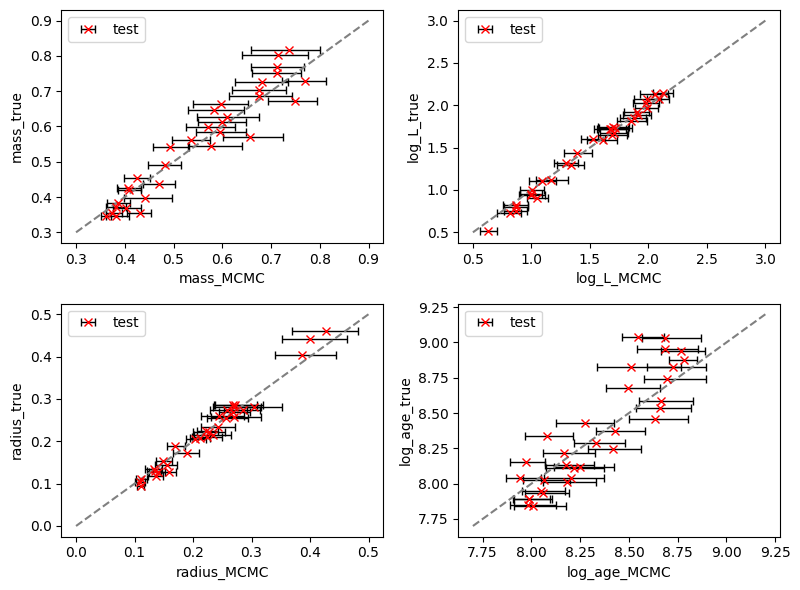

In [18]:
import numpy as np
import matplotlib.pyplot as plt

def plot(ax, x, y, x_low, x_up, line_x_range, fmt, color, label):
    ax.errorbar(x, y, xerr=[x-x_low, x_up-x], fmt=fmt, color=color, ecolor='black', elinewidth=1, capsize=3, label=label, markerfacecolor='none', markeredgecolor=color)
    line_x = np.linspace(line_x_range[0], line_x_range[1], 100)
    ax.plot(line_x, line_x, color = 'gray', linestyle = '--')
    plt.xlim=(line_x_range)
    plt.ylim=(line_x_range)
    ax.legend()

fig, axes = plt.subplots(2, 2, dpi=100, figsize=(8, 6))

axes[0, 0].set_xlabel('mass_MCMC')
axes[0, 0].set_ylabel('mass_true')
plot(axes[0, 0], test_mass, test_mass_true, test_mass_low, test_mass_up, [0.3, 0.9], 'x', 'r', 'test')
# plot(axes[0, 0], lei_mass, lei_mass_lei, lei_mass_low, lei_mass_up, [0.3, 0.9],'v', 'b', 'Lei 2023')
# plot(axes[0, 0], fontaine_mass, fontaine_mass_true, fontaine_mass_low, fontaine_mass_up, [0.3, 0.9],'s', 'g', 'Fontaine 2012')

axes[0, 1].set_xlabel('log_L_MCMC')
axes[0, 1].set_ylabel('log_L_true')
plot(axes[0, 1], test_log_L, test_log_L_true, test_log_L_low, test_log_L_up,  [0.5, 3], 'x', 'r', 'test')
# plot(axes[0, 1], lei_log_L, lei_log_L_lei, lei_log_L_low, lei_log_L_up, [0.5, 3],'v', 'b', 'Lei 2023')

axes[1, 0].set_xlabel('radius_MCMC')
axes[1, 0].set_ylabel('radius_true')
plot(axes[1, 0], test_radius, test_radius_true, test_radius_low, test_radius_up,  [0, 0.5], 'x', 'r', 'test')
# plot(axes[1, 0], lei_radius, lei_radius_lei, lei_radius_low, lei_radius_up, [0, 0.5],'v', 'b', 'Lei 2023')

axes[1, 1].set_xlabel('log_age_MCMC')
axes[1, 1].set_ylabel('log_age_true')
plot(axes[1, 1], test_age, test_age_true, test_age_low, test_age_up,  [7.7, 9.2], 'x', 'r', 'test')

plt.tight_layout()
plt.show()

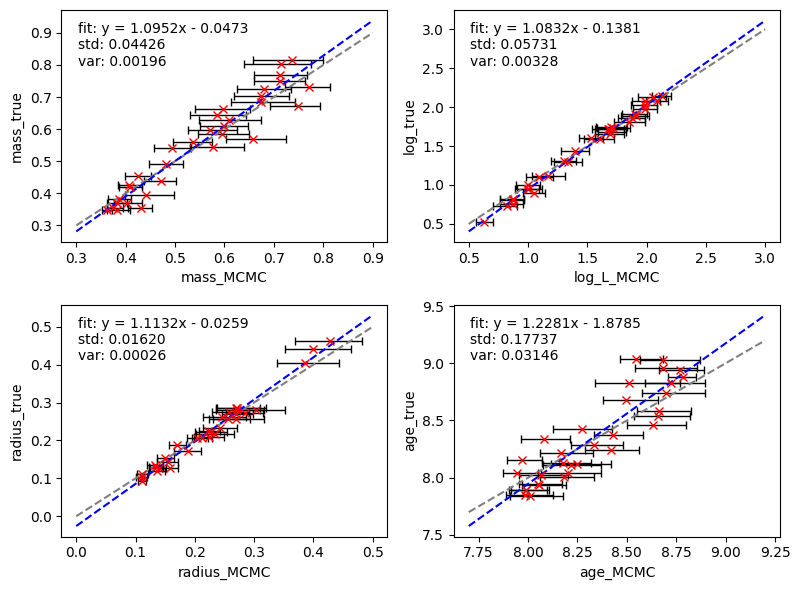

In [7]:
fig, axes = plt.subplots(2, 2, figsize=(8, 6), dpi=100)

def plot(ax, x, y, x_low, x_up, xlabel, ylabel, line_x_range):
    m, b = np.polyfit(x, y, 1)
    residuals = x - y
    std_dev = np.std(residuals)
    variance = np.var(residuals)
    ax.errorbar(x, y, xerr=[x-x_low, x_up-x], fmt='x', color='r', ecolor='black', elinewidth=1, capsize=3)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    line_x = np.linspace(line_x_range[0], line_x_range[1], 100)
    ax.plot(line_x, line_x, color = 'gray', linestyle = '--')
    ax.plot(line_x, m * line_x + b, color='blue', linestyle = '--')
    ax.text(0.05, 0.90, f'fit: y = {m:.4f}x {"+" if b >= 0 else "-"} {abs(b):.4f}', transform=ax.transAxes)
    ax.text(0.05, 0.83, f'std: {std_dev:.5f}', transform=ax.transAxes)
    ax.text(0.05, 0.76, f'var: {variance:.5f}', transform=ax.transAxes)

plot(axes[0, 0], test_mass, test_mass_true, test_mass_low, test_mass_up, 'mass_MCMC', 'mass_true', [0.3, 0.9])
plot(axes[0, 1], test_log_L, test_log_L_true, test_log_L_low, test_log_L_up, 'log_L_MCMC', 'log_true', [0.5, 3])
plot(axes[1, 0], test_radius, test_radius_true, test_radius_low, test_radius_up, 'radius_MCMC', 'radius_true', [0, 0.5])
plot(axes[1, 1], test_age, test_age_true, test_age_low, test_age_up, 'age_MCMC', 'age_true', [7.7, 9.2])

plt.tight_layout()
plt.show()

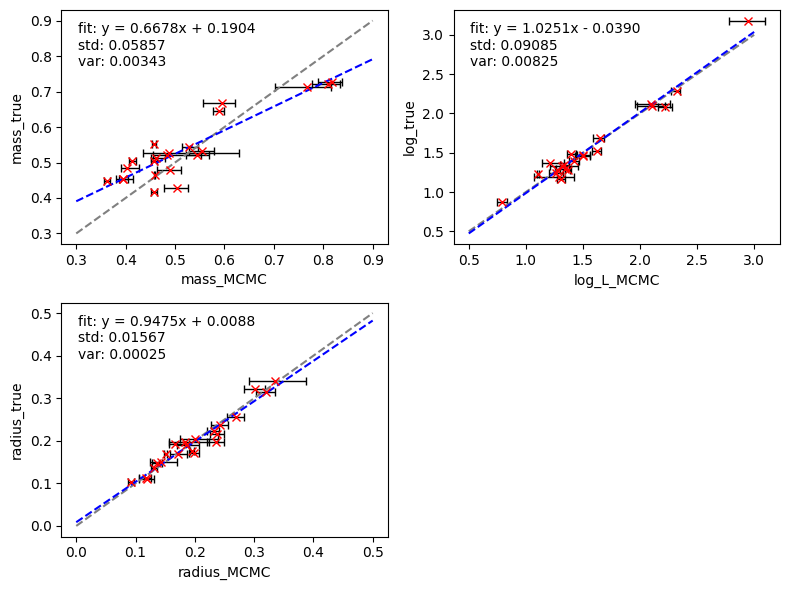

In [8]:
fig, axes = plt.subplots(2, 2, figsize=(8, 6), dpi=100)

def plot(ax, x, y, x_low, x_up, xlabel, ylabel, line_x_range):
    m, b = np.polyfit(x, y, 1)
    residuals = x - y
    std_dev = np.std(residuals)
    variance = np.var(residuals)
    ax.errorbar(x, y, xerr=[x-x_low, x_up-x], fmt='x', color='r', ecolor='black', elinewidth=1, capsize=3)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    line_x = np.linspace(line_x_range[0], line_x_range[1], 100)
    ax.plot(line_x, line_x, color = 'gray', linestyle = '--')
    ax.plot(line_x, m * line_x + b, color='blue', linestyle = '--')
    ax.text(0.05, 0.90, f'fit: y = {m:.4f}x {"+" if b >= 0 else "-"} {abs(b):.4f}', transform=ax.transAxes)
    ax.text(0.05, 0.83, f'std: {std_dev:.5f}', transform=ax.transAxes)
    ax.text(0.05, 0.76, f'var: {variance:.5f}', transform=ax.transAxes)

plot(axes[0, 0], lei_mass, lei_mass_lei, lei_mass_low, lei_mass_up, 'mass_MCMC', 'mass_true', [0.3, 0.9])
plot(axes[0, 1], lei_log_L, lei_log_L_lei, lei_log_L_low, lei_log_L_up, 'log_L_MCMC', 'log_true', [0.5, 3])
plot(axes[1, 0], lei_radius, lei_radius_lei, lei_radius_low, lei_radius_up, 'radius_MCMC', 'radius_true', [0, 0.5])
# plot(axes[1, 1], test_age, test_age_true, test_age_low, test_age_up, 'age_MCMC', 'age_true', [7.7, 9.2])
axes[-1, -1].axis('off')
plt.tight_layout()
plt.show()

In [6]:
import matplotlib.pyplot as plt
import matplotlib.style as style
import pandas as pd
import numpy as np
from astropy.io import fits

# # num_rows = data_result.shape[0]
data_result_test = pd.read_csv('/home/fmq/blog_git/blog/MCMC/test.dat', sep=' ')
data_result_test = data_result_test.iloc[41:-1]
data_result_test = data_result_test[data_result_test['radius_true']<0.5]
test_name = data_result_test['name']
test_mass = data_result_test['mass']
test_mass_low = data_result_test['mass_low']
test_mass_up = data_result_test['mass_up']
test_mass_lei = data_result_test['mass_lei']
test_mass_true = data_result_test['mass_true']

test_log_L = data_result_test['log_L']
test_log_L_low = data_result_test['log_L_low']
test_log_L_up = data_result_test['log_L_up']
test_log_L_lei = data_result_test['log_L_lei']
test_log_L_true = data_result_test['log_L_true']

test_radius = data_result_test['radius']
test_radius_low = data_result_test['radius_low']
test_radius_up = data_result_test['radius_up']
test_radius_lei = data_result_test['radius_lei']
test_radius_true = data_result_test['radius_true']

test_age = data_result_test['age']
test_age_low = data_result_test['age_low']
test_age_up = data_result_test['age_up']
test_age_true = data_result_test['age_true']

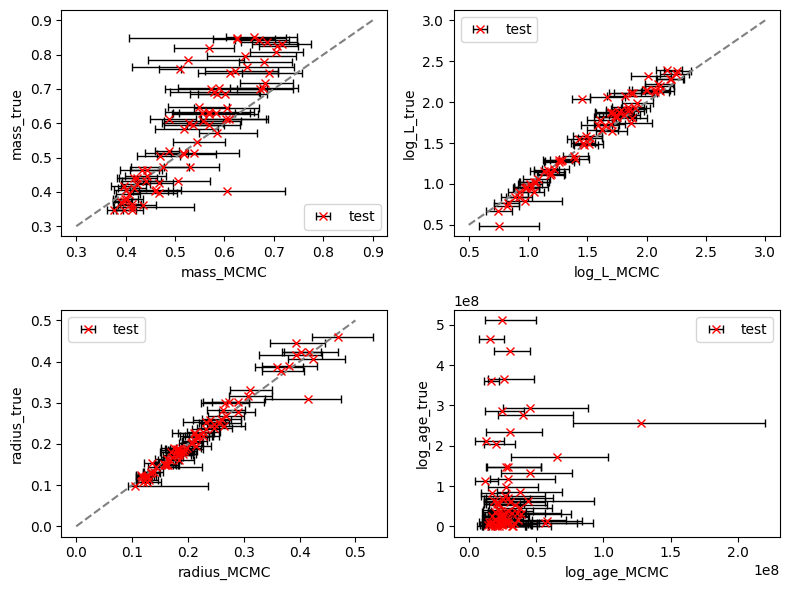

In [7]:
import numpy as np
import matplotlib.pyplot as plt

def plot(ax, x, y, x_low, x_up, line_x_range, fmt, color, label):
    ax.errorbar(x, y, xerr=[x-x_low, x_up-x], fmt=fmt, color=color, ecolor='black', elinewidth=1, capsize=3, label=label, markerfacecolor='none', markeredgecolor=color)
    line_x = np.linspace(line_x_range[0], line_x_range[1], 100)
    ax.plot(line_x, line_x, color = 'gray', linestyle = '--')
    plt.xlim=(line_x_range)
    plt.ylim=(line_x_range)
    ax.legend()

fig, axes = plt.subplots(2, 2, dpi=100, figsize=(8, 6))

axes[0, 0].set_xlabel('mass_MCMC')
axes[0, 0].set_ylabel('mass_true')
plot(axes[0, 0], test_mass, test_mass_true, test_mass_low, test_mass_up, [0.3, 0.9], 'x', 'r', 'test')
# plot(axes[0, 0], lei_mass, lei_mass_lei, lei_mass_low, lei_mass_up, [0.3, 0.9],'v', 'b', 'Lei 2023')
# plot(axes[0, 0], fontaine_mass, fontaine_mass_true, fontaine_mass_low, fontaine_mass_up, [0.3, 0.9],'s', 'g', 'Fontaine 2012')

axes[0, 1].set_xlabel('log_L_MCMC')
axes[0, 1].set_ylabel('log_L_true')
plot(axes[0, 1], test_log_L, test_log_L_true, test_log_L_low, test_log_L_up,  [0.5, 3], 'x', 'r', 'test')
# plot(axes[0, 1], lei_log_L, lei_log_L_lei, lei_log_L_low, lei_log_L_up, [0.5, 3],'v', 'b', 'Lei 2023')

axes[1, 0].set_xlabel('radius_MCMC')
axes[1, 0].set_ylabel('radius_true')
plot(axes[1, 0], test_radius, test_radius_true, test_radius_low, test_radius_up,  [0, 0.5], 'x', 'r', 'test')
# plot(axes[1, 0], lei_radius, lei_radius_lei, lei_radius_low, lei_radius_up, [0, 0.5],'v', 'b', 'Lei 2023')

axes[1, 1].set_xlabel('log_age_MCMC')
axes[1, 1].set_ylabel('log_age_true')
plot(axes[1, 1], test_age, test_age_true, test_age_low, test_age_up,  [7.7, 9.2], 'x', 'r', 'test')

plt.tight_layout()
plt.show()

/tmp/ipykernel_321475/1839406624.py:8: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('viridis')  # 或者任何你喜欢的颜色映射


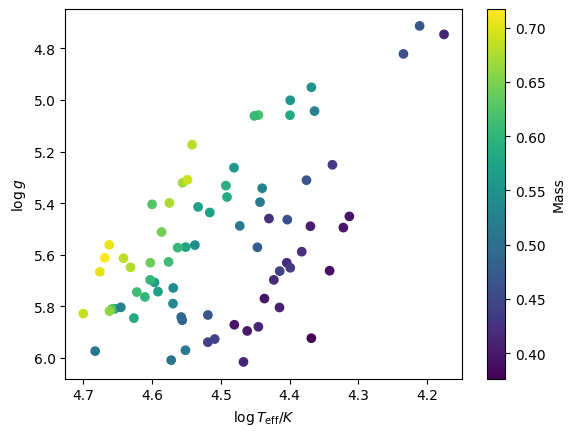

In [8]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
ax = plt.gca()



# 创建一个颜色映射
cmap = cm.get_cmap('viridis')  # 或者任何你喜欢的颜色映射
log_g = data_result_test['log_g']
log_Teff = data_result_test['log_Teff']
sc = plt.scatter(log_Teff, log_g, c=test_mass, cmap=cmap)
cbar = plt.colorbar(sc)
cbar.set_label('Mass')
ax.invert_xaxis()
ax.invert_yaxis()
ax.set(xlabel=r'$\log T_{\rm eff}/K$', ylabel=r'$\log g$')
plt.show()

/tmp/ipykernel_321475/124498289.py:8: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('viridis')  # 或者任何你喜欢的颜色映射


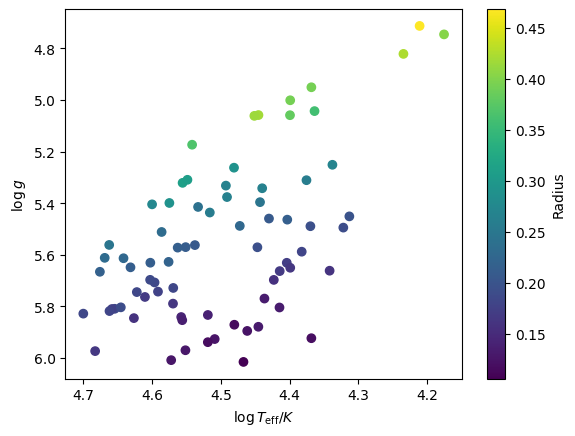

In [10]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
ax = plt.gca()



# 创建一个颜色映射
cmap = cm.get_cmap('viridis')  # 或者任何你喜欢的颜色映射
log_g = data_result_test['log_g']
log_Teff = data_result_test['log_Teff']
sc = plt.scatter(log_Teff, log_g, c=test_radius, cmap=cmap)
cbar = plt.colorbar(sc)
cbar.set_label('Radius')
ax.invert_xaxis()
ax.invert_yaxis()
ax.set(xlabel=r'$\log T_{\rm eff}/K$', ylabel=r'$\log g$')
plt.show()

In [21]:
import matplotlib.pyplot as plt
import matplotlib.style as style
import pandas as pd
import numpy as np
from astropy.io import fits

# # num_rows = data_result.shape[0]
data_result_lei = pd.read_csv('/home/fmq/blog_git/blog/MCMC/lei_smooth.dat', sep=' ')
# data_result_lei = data_result_lei.iloc[56:-1]
data_result_lei = data_result_lei[data_result_lei['mass_lei']> 0.35]
# data_result_lei = data_result_lei[abs(data_result_lei['mass_lei']-data_result_lei['mass'])< 0.1]
# data_result_lei = data_result_lei[abs(data_result_lei['mass_lei']-data_result_lei['mass_up'])< 0.1]
# data_result_lei = data_result_lei[data_result_lei['he_class'] == 'sdB']
lei_name = data_result_lei['name']
lei_mass = data_result_lei['mass']
lei_mass_low = data_result_lei['mass_low']
lei_mass_up = data_result_lei['mass_up']
lei_mass_lei = data_result_lei['mass_lei']

lei_log_L = data_result_lei['log_L']
lei_log_L_low = data_result_lei['log_L_low']
lei_log_L_up = data_result_lei['log_L_up']
lei_log_L_lei = data_result_lei['log_L_lei']

lei_radius = data_result_lei['radius']
lei_radius_low = data_result_lei['radius_low']
lei_radius_up = data_result_lei['radius_up']
lei_radius_lei = data_result_lei['radius_lei']


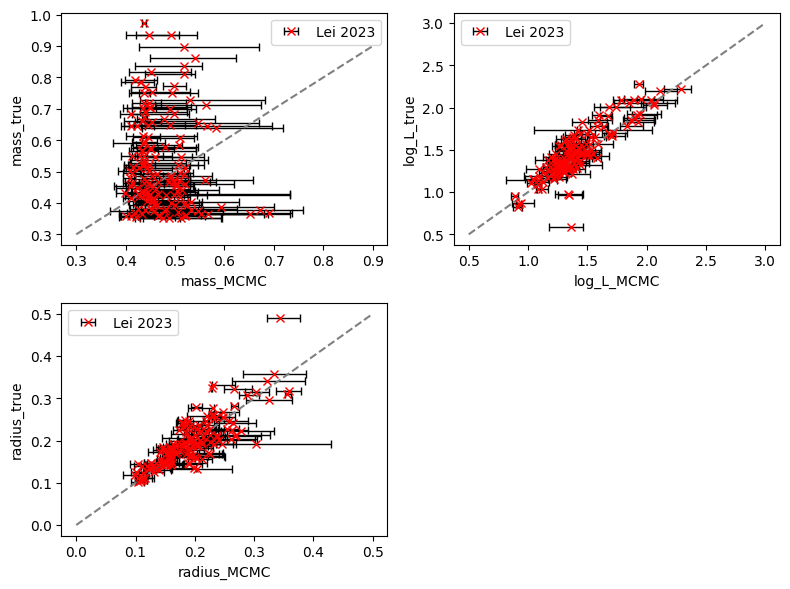

In [22]:
import numpy as np
import matplotlib.pyplot as plt

def plot(ax, x, y, x_low, x_up, line_x_range, fmt, color, label):
    ax.errorbar(x, y, xerr=[x-x_low, x_up-x], fmt=fmt, color=color, ecolor='black', elinewidth=1, capsize=3, label=label, markerfacecolor='none', markeredgecolor=color)
    line_x = np.linspace(line_x_range[0], line_x_range[1], 100)
    ax.plot(line_x, line_x, color = 'gray', linestyle = '--')
    plt.xlim=(line_x_range)
    plt.ylim=(line_x_range)
    ax.legend()

fig, axes = plt.subplots(2, 2, dpi=100, figsize=(8, 6))

axes[0, 0].set_xlabel('mass_MCMC')
axes[0, 0].set_ylabel('mass_true')
# plot(axes[0, 0], test_mass, test_mass_true, test_mass_low, test_mass_up, [0.3, 0.9], 'x', 'r', 'test')
plot(axes[0, 0], lei_mass, lei_mass_lei, lei_mass_low, lei_mass_up, [0.3, 0.9],'x', 'r', 'Lei 2023')
# plot(axes[0, 0], fontaine_mass, fontaine_mass_true, fontaine_mass_low, fontaine_mass_up, [0.3, 0.9],'s', 'g', 'Fontaine 2012')

axes[0, 1].set_xlabel('log_L_MCMC')
axes[0, 1].set_ylabel('log_L_true')
# plot(axes[0, 1], test_log_L, test_log_L_true, test_log_L_low, test_log_L_up,  [0.5, 3], 'x', 'r', 'test')
plot(axes[0, 1], lei_log_L, lei_log_L_lei, lei_log_L_low, lei_log_L_up, [0.5, 3],'x', 'r', 'Lei 2023')

axes[1, 0].set_xlabel('radius_MCMC')
axes[1, 0].set_ylabel('radius_true')
# plot(axes[1, 0], test_radius, test_radius_true, test_radius_low, test_radius_up,  [0, 0.5], 'x', 'r', 'test')
plot(axes[1, 0], lei_radius, lei_radius_lei, lei_radius_low, lei_radius_up, [0, 0.5],'x', 'r', 'Lei 2023')

# axes[1, 1].set_xlabel('log_age_MCMC')
# axes[1, 1].set_ylabel('log_age_true')
# plot(axes[1, 1], test_age, test_age_true, test_age_low, test_age_up,  [7.7, 9.2], 'x', 'r', 'test')
axes[-1, -1].axis('off')
plt.tight_layout()
plt.show()

/tmp/ipykernel_348974/3553892401.py:8: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('viridis')  # 或者任何你喜欢的颜色映射


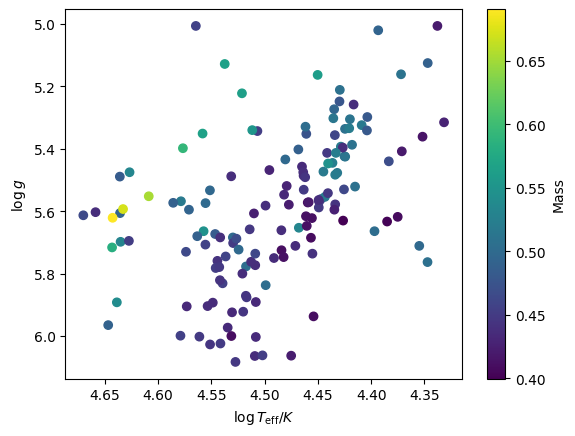

In [23]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
ax = plt.gca()



# 创建一个颜色映射
cmap = cm.get_cmap('viridis')  # 或者任何你喜欢的颜色映射
log_g = data_result_lei['log_g']
log_Teff = data_result_lei['log_Teff']
sc = plt.scatter(log_Teff, log_g, c=lei_mass, cmap=cmap)
cbar = plt.colorbar(sc)
cbar.set_label('Mass')
ax.invert_xaxis()
ax.invert_yaxis()
ax.set(xlabel=r'$\log T_{\rm eff}/K$', ylabel=r'$\log g$')
plt.show()

/tmp/ipykernel_348974/622329040.py:8: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('viridis')  # 或者任何你喜欢的颜色映射


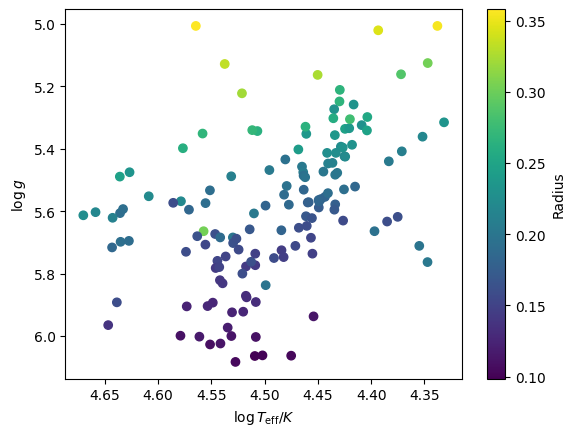

In [24]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
ax = plt.gca()



# 创建一个颜色映射
cmap = cm.get_cmap('viridis')  # 或者任何你喜欢的颜色映射
log_g = data_result_lei['log_g']
log_Teff = data_result_lei['log_Teff']
sc = plt.scatter(log_Teff, log_g, c=lei_radius, cmap=cmap)
cbar = plt.colorbar(sc)
cbar.set_label('Radius')
ax.invert_xaxis()
ax.invert_yaxis()
ax.set(xlabel=r'$\log T_{\rm eff}/K$', ylabel=r'$\log g$')
plt.show()

In [32]:
import matplotlib.pyplot as plt
import matplotlib.style as style
import pandas as pd
import numpy as np
from astropy.io import fits

# # num_rows = data_result.shape[0]
data_result_lei = pd.read_csv('/home/fmq/blog_git/blog/MCMC/lei_smooth.dat', sep=' ')
# data_result_lei = data_result_lei.iloc[56:-1]
data_result_lei = data_result_lei[data_result_lei['radius_lei']< 0.45]
# data_result_lei = data_result_lei[abs(data_result_lei['mass_lei']-data_result_lei['mass'])< 0.1]
# data_result_lei = data_result_lei[abs(data_result_lei['mass_lei']-data_result_lei['mass_up'])< 0.1]
# data_result_lei = data_result_lei[data_result_lei['he_class'] == 'sdB']
lei_name = data_result_lei['name']
lei_mass = data_result_lei['mass']
lei_mass_low = data_result_lei['mass_low']
lei_mass_up = data_result_lei['mass_up']
lei_mass_lei = data_result_lei['mass_lei']

lei_log_L = data_result_lei['log_L']
lei_log_L_low = data_result_lei['log_L_low']
lei_log_L_up = data_result_lei['log_L_up']
lei_log_L_lei = data_result_lei['log_L_lei']

lei_radius = data_result_lei['radius']
lei_radius_low = data_result_lei['radius_low']
lei_radius_up = data_result_lei['radius_up']
lei_radius_lei = data_result_lei['radius_lei']

log_g = data_result_lei['log_g']


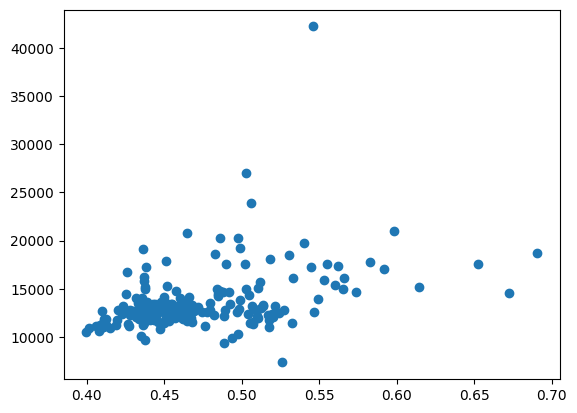

In [33]:

import numpy as np
import matplotlib.pyplot as plt

m_1 = 10**log_g*lei_radius**2
ax = plt.gca()
plt.scatter(lei_mass, m_1)
plt.show()

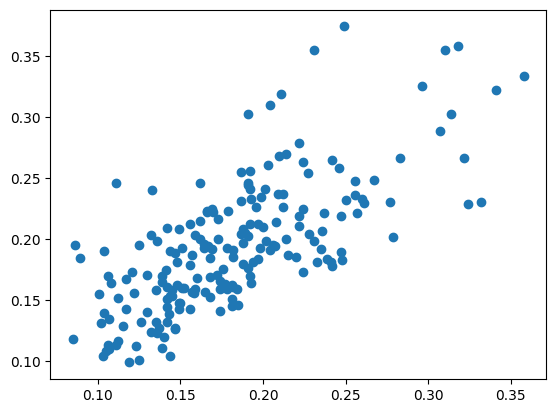

In [34]:

import numpy as np
import matplotlib.pyplot as plt

ax = plt.gca()
plt.scatter(lei_radius_lei, lei_radius)
plt.show()